Prediction of CO2 emission using Regression Techniques.

In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e20/sample_submission.csv
/kaggle/input/playground-series-s3e20/train.csv
/kaggle/input/playground-series-s3e20/test.csv


# Data EDA (Exploratory Data Analysis)
Conducted to understand the underlying patterns, relationships, and distributions within the dataset.

In [57]:
train_df = pd.read_csv('/kaggle/input/playground-series-s3e20/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s3e20/test.csv')

In [58]:
train_df.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [59]:
test_df.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.51,29.29,2022,0,NaN,NaN,NaN,NaN,NaN,...,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,ID_-0.510_29.290_2022_01,-0.51,29.29,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,...,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,ID_-0.510_29.290_2022_02,-0.51,29.29,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,...,34133.080469,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361
3,ID_-0.510_29.290_2022_03,-0.51,29.29,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,...,50854.991076,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774
4,ID_-0.510_29.290_2022_04,-0.51,29.29,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,...,46594.685145,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807


In [60]:
train_df.describe()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,79023.000000,79023.000000,79023.000000,79023.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,...,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,79023.000000
mean,-1.891072,29.880155,2020.000000,26.000000,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,...,5592.377478,59420.297456,4670.430869,19.139241,0.271460,-10.784832,40.436976,-86.800583,27.925981,81.940552
std,0.694522,0.810375,0.816502,15.297155,0.000272,0.185382,0.000206,0.071364,64.263368,14.149950,...,1428.503002,9051.163609,1359.251583,13.547047,0.049434,30.374462,6.428216,37.837269,4.403835,144.299648
min,-3.299000,28.228000,2019.000000,0.000000,-0.000996,0.241822,-0.000887,0.000000,-179.537059,0.099237,...,1050.661782,24779.033704,1050.496816,1.844529,0.017697,-102.739731,2.998873,-153.464211,10.818288,0.000000
25%,-2.451000,29.262000,2019.000000,13.000000,-0.000096,0.705817,-0.000078,0.110535,-56.782383,28.844520,...,4595.400519,53175.779928,3680.856344,9.974574,0.241453,-30.309170,35.829907,-125.991158,24.686763,9.797995
50%,-1.882000,29.883000,2020.000000,26.000000,0.000024,0.809118,0.000019,0.161855,-12.441726,37.784299,...,5573.854309,59332.532548,4621.755170,15.130688,0.272747,-12.673914,41.119630,-84.644352,28.333630,45.593445
75%,-1.303000,30.471000,2021.000000,39.000000,0.000153,0.942792,0.000121,0.211824,72.059990,47.634875,...,6542.303642,65663.842684,5572.983223,23.785030,0.302892,9.402202,44.446272,-48.132701,31.499883,109.549595
max,-0.510000,31.532000,2021.000000,52.000000,0.004191,1.885239,0.004236,0.299998,122.095200,66.242012,...,12384.239458,89291.615576,11384.239458,250.000000,0.736514,78.223037,65.951248,-22.653170,42.060436,3167.768000


In [61]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

In [62]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24353 entries, 0 to 24352
Data columns (total 75 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      24353 non-null  object 
 1   latitude                                                  24353 non-null  float64
 2   longitude                                                 24353 non-null  float64
 3   year                                                      24353 non-null  int64  
 4   week_no                                                   24353 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  18211 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              18211 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            18211 non-null  float64
 8   SulphurDioxide_c

* All the columns are numerical and there are no categorical values.
* There are many null values present in the columns, which has to be handled before modelling.
* UvAerosolLayerHeight - Dropping these columns as we have only 439 non null values.

In [63]:
train_df=train_df.drop(['UvAerosolLayerHeight_aerosol_height',
 'UvAerosolLayerHeight_aerosol_pressure',
 'UvAerosolLayerHeight_aerosol_optical_depth',
 'UvAerosolLayerHeight_sensor_zenith_angle',
 'UvAerosolLayerHeight_sensor_azimuth_angle',
 'UvAerosolLayerHeight_solar_azimuth_angle',
 'UvAerosolLayerHeight_solar_zenith_angle'],axis=1)
test_df=test_df.drop(['UvAerosolLayerHeight_aerosol_height',
 'UvAerosolLayerHeight_aerosol_pressure',
 'UvAerosolLayerHeight_aerosol_optical_depth',
 'UvAerosolLayerHeight_sensor_zenith_angle',
 'UvAerosolLayerHeight_sensor_azimuth_angle',
 'UvAerosolLayerHeight_solar_azimuth_angle',
 'UvAerosolLayerHeight_solar_zenith_angle'],axis=1)

* Latitude, Longitude, Year and Week columns has less number of unique values.
* Data Visualizations are done using these columns to see the trend

In [64]:
count_df = train_df.nunique()
count_df.head()

ID_LAT_LON_YEAR_WEEK    79023
latitude                  452
longitude                 453
year                        3
week_no                    53
dtype: int64

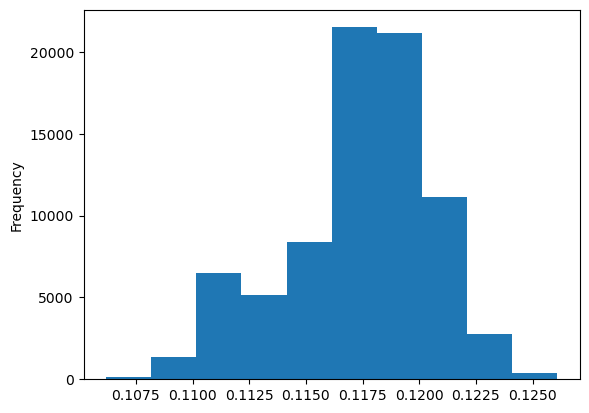

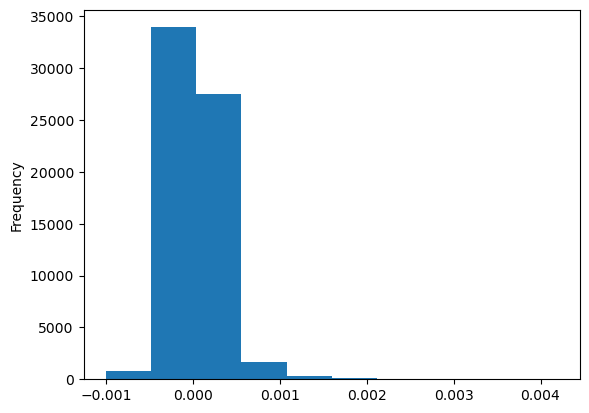

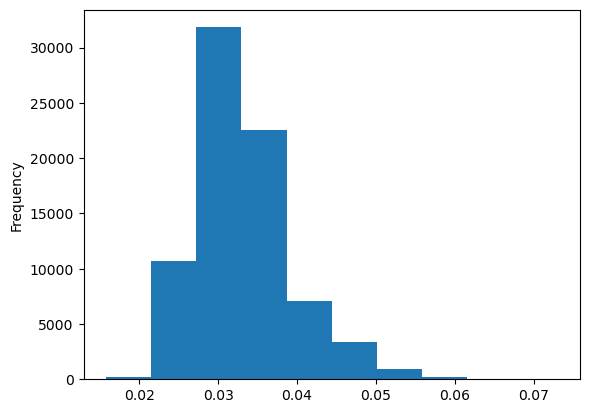

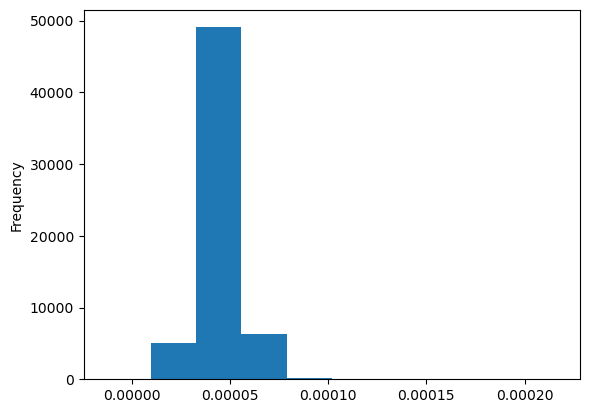

<Figure size 640x480 with 0 Axes>

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

#train_df[['SulphurDioxide_SO2_column_number_density', 'CarbonMonoxide_CO_column_number_density', 'NitrogenDioxide_NO2_column_number_density', 'Ozone_O3_column_number_density']])
train_df['Ozone_O3_column_number_density'].plot(kind='hist')
plt.show()
plt.clf()
train_df['SulphurDioxide_SO2_column_number_density'].plot(kind='hist')
plt.show()
plt.clf()
train_df['CarbonMonoxide_CO_column_number_density'].plot(kind='hist')
plt.show()
plt.clf()
train_df['NitrogenDioxide_NO2_column_number_density'].plot(kind='hist')
plt.show()
plt.clf()



# Data Visualization
1. Total Emissions per Year
   * Year 2020 has low emission compared to the other years.

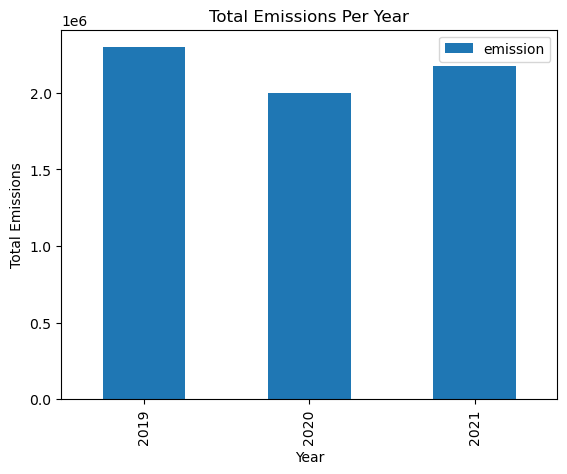

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

year_df = train_df.groupby('year')['emission'].sum()
ax = year_df.plot(kind='bar')
plt.title('Total Emissions Per Year')
plt.xlabel('Year')
plt.ylabel('Total Emissions')

# Manually setting x-axis tick positions and labels
plt.xticks(range(len(year_df.index)), year_df.index)
plt.legend()

plt.show()


In [67]:
l_df = train_df.groupby(['latitude','longitude'])['emission'].sum().reset_index()

l_df['emission'].max()

355115.6289

* The map below illustrates consistent emission levels across regions, with occasional spikes occurring during certain weeks.

In [68]:
import pandas as pd
import plotly.express as px

fig = px.scatter_mapbox(train_df, 
                        lat = 'latitude', 
                        lon = 'longitude', 
                        color = 'emission',
                        animation_frame = 'week_no',
                        zoom = 6)

fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show();


In [ ]:
train_df.head()

In [69]:
yearweak_df = train_df.groupby(['year','week_no'])['emission'].sum()
yearweak_df

year  week_no
2019  0          38139.357092
      1          40941.046134
      2          42746.385214
      3          43688.270329
      4          44528.762029
                     ...     
2021  48         41557.589741
      49         41220.461681
      50         41145.785598
      51         39613.370716
      52         38384.352129
Name: emission, Length: 159, dtype: float64

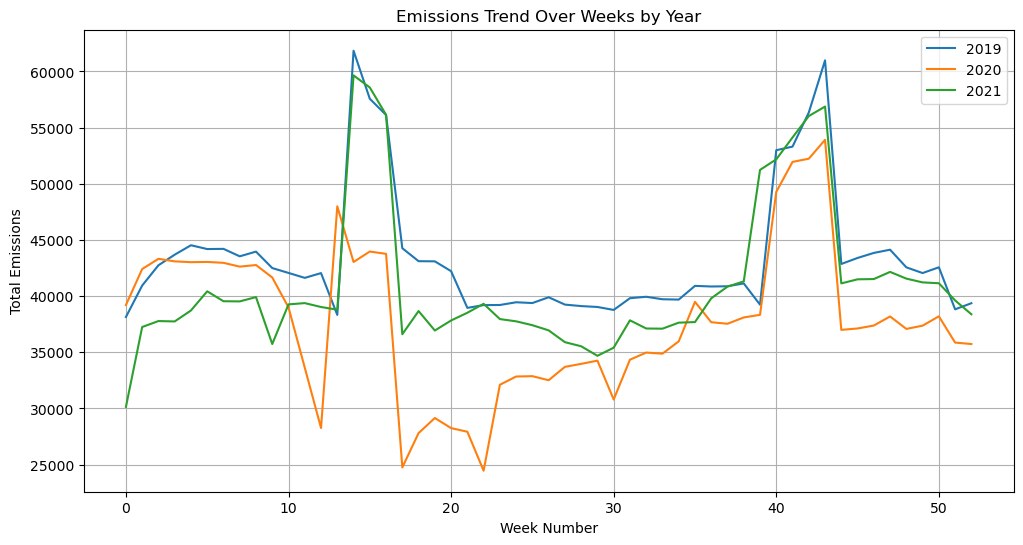

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named yearweak_df
# You can convert the Series to a DataFrame for easier manipulation
yearweak_df = yearweak_df.reset_index()

# Create a line plot
plt.figure(figsize=(12, 6))
for year in yearweak_df['year'].unique():
    data_subset = yearweak_df[yearweak_df['year'] == year]
    plt.plot(data_subset['week_no'], data_subset['emission'], label=str(year))

plt.title('Emissions Trend Over Weeks by Year')
plt.xlabel('Week Number')
plt.ylabel('Total Emissions')
plt.legend()
plt.grid(True)
plt.show()


# Feature Engineering

Column for Season
* March - May - 1
* June - Aug- 2 
* Sep - Nov - 3
* Dec - Feb - 4

In [71]:
train_df['date'] = pd.to_datetime(train_df['year'].astype(str) + '-' + train_df['week_no'].astype(str) + '-1', format='%Y-%W-%w') 
train_df['season'] = train_df['date'].dt.month.apply(lambda x: 1 if 3 <= x <= 5 else 2 if 6 <= x <= 8
                                                    else 3 if 9 <= x <= 11 else 4 )
train_df.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,date,season
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994,2018-12-31,4
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176,2019-01-07,4
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381,2019-01-14,4
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286,2019-01-21,4
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317,2019-01-28,4


Column for Holidays
* Considering the last week in Dec, 1st week in Jan and 2 weeks in April and July as Holidays as per Rwanda School Holidays

In [72]:
train_df['holidays']=train_df['week_no'].apply(lambda x: 1 if x in [0,52,13,14,28,29] else 0)
train_df.head()


,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,date,season,holidays
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994,2018-12-31,4,1
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176,2019-01-07,4,0
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381,2019-01-14,4,0
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286,2019-01-21,4,0
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317,2019-01-28,4,0


* 2 * np.pi * train['week_no']/53: This part calculates the phase of the sine and cosine waves corresponding to the week number. Here, 53 represents the total number of weeks in a year, and train['week_no'] is the week number you are encoding.

* np.sin(2 * np.pi * train['week_no']/53): This calculates the sine value of the phase, which represents the cyclic pattern in a sinusoidal manner.

* np.cos(2 * np.pi * train['week_no']/53): This calculates the cosine value of the phase, similar to the sine value but shifted in phase.

* By combining both sine and cosine functions, we capture both the amplitude and phase information of the cyclic pattern. These new features 'week_sin' and 'week_cos' can then be used as inputs for machine learning models to potentially improve the model's ability to recognize and learn from the cyclic behavior in your data.

In [73]:
train_df['week_sin'] = np.sin(2 * np.pi * train_df['week_no']/53)
train_df['week_cos'] = np.cos(2 * np.pi * train_df['week_no']/53)

Repeating the same for Month & Season

In [74]:
train_df['month_sin'] = np.sin(2 * np.pi * train_df['date'].dt.month/12)
train_df['month_cos'] = np.cos(2 * np.pi * train_df['date'].dt.month/12)

train_df['season_sin'] = np.sin(2 * np.pi * train_df['season']/4)
train_df['season_cos'] = np.cos(2 * np.pi * train_df['season']/4)


* This code rotates the geographical data points represented by longitude and latitude by 15 degrees in a clockwise direction. It calculates new x and y coordinates for each point after applying the rotation, and the resulting rotated x-coordinates are stored in the 'rot_15_x' column.

In [75]:
train_df['rot_15_x'] = (np.cos(np.radians(15)) * train_df['longitude']) + (np.sin(np.radians(15)) * train_df['latitude'])
train_df['rot_15_y'] = (np.cos(np.radians(15)) * train_df['latitude']) + (np.sin(np.radians(15)) * train_df['longitude'])

train_df['rot_30_x'] = (np.cos(np.radians(30)) * train_df['longitude']) + (np.sin(np.radians(30)) * train_df['latitude'])
train_df['rot_30_y'] = (np.cos(np.radians(30)) * train_df['latitude']) + (np.sin(np.radians(30)) * train_df['longitude'])


* Rwanda had a lockdown for covid in March 2020 for 2 weeks and schools remained shut for more than 10 months and schools resumed from March 2021 in most of the places. So let us consider this period to be covid period and a set a flag to 1.

In [76]:
train_df['covid'] = np.where(
    (train_df['year'] == 2020) & (train_df['date'].dt.month > 2) |
    (train_df['year'] == 2021) & (train_df['date'].dt.month < 2),
    1,
    0
)

* PCA (Principal Component Analysis) is performed to transform the original geographical coordinates (latitude and longitude) into new dimensions (principal components) that capture the most significant variations in the data. This reduction in dimensionality helps simplify data analysis, , and modeling, while retaining as much relevant information as possible

In [ ]:
#from sklearn.decomposition import PCA

#pca = PCA().fit(train_df[['latitude', 'longitude']].values)
#pca_transformed = pca.transform(train_df[['latitude', 'longitude']].values)
#train_df['pca_x'] = pca_transformed[:, 0]
#train_df['pca_y'] = pca_transformed[:, 1]


* There are few locations which had zero emissions for few weeks. A new column for null_emission is created as a feature

In [77]:
from sklearn.cluster import KMeans

km_df = train_df.groupby(by=['latitude', 'longitude'], as_index=False)['emission'].mean()

model = KMeans(n_clusters=7, random_state=42)
model.fit(km_df[['latitude', 'longitude']])  
km_df['kmeans'] = model.predict(km_df[['latitude', 'longitude']])

km_df['null_emission'] = km_df['emission'].apply(lambda x: 1 if x == 0 else 0)

# Merging km_df back into train_df and test_df
train_df = train_df.merge(km_df[['latitude', 'longitude', 'kmeans','null_emission']], on=['latitude', 'longitude'])
test_df = test_df.merge(km_df[['latitude', 'longitude', 'kmeans','null_emission']], on=['latitude', 'longitude'])


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
test_df.head()

In [78]:
features = ['latitude','longitude','year','week_sin','week_cos','month_sin','month_cos',
            'holidays','season_sin','season_cos','rot_15_x','rot_15_y',
            'rot_30_x','rot_30_y','covid','kmeans','null_emission']
X=pd.DataFrame()
X=train_df[features]
Y=train_df['emission']

In [79]:
X.head()

,latitude,longitude,year,week_sin,week_cos,month_sin,month_cos,holidays,season_sin,season_cos,rot_15_x,rot_15_y,rot_30_x,rot_30_y,covid,kmeans,null_emission
0,-0.51,29.29,2019,0.000000,1.000000,-2.449294e-16,1.000000,1,-2.449294e-16,1.0,28.15997,7.088188,25.110884,14.203327,0,3,0
1,-0.51,29.29,2019,0.118273,0.992981,5.000000e-01,0.866025,0,-2.449294e-16,1.0,28.15997,7.088188,25.110884,14.203327,0,3,0
2,-0.51,29.29,2019,0.234886,0.972023,5.000000e-01,0.866025,0,-2.449294e-16,1.0,28.15997,7.088188,25.110884,14.203327,0,3,0
3,-0.51,29.29,2019,0.348202,0.937420,5.000000e-01,0.866025,0,-2.449294e-16,1.0,28.15997,7.088188,25.110884,14.203327,0,3,0
4,-0.51,29.29,2019,0.456629,0.889657,5.000000e-01,0.866025,0,-2.449294e-16,1.0,28.15997,7.088188,25.110884,14.203327,0,3,0


# Modelling the Data

In [80]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [81]:
n_estimators = 200
min_samples_leaf = 6
max_depth = 8
random_state = 42

# Initialize the models
model_rf = RandomForestRegressor(max_depth=max_depth, random_state=random_state)
model_xg = XGBRegressor(max_depth=max_depth, random_state=random_state)
model_gb = GradientBoostingRegressor(min_samples_leaf=min_samples_leaf, max_depth=max_depth, random_state=random_state)

In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model_rf.fit(X_train,y_train)
pred1 = model_rf.predict(X_test)

mse = mean_squared_error(y_test, pred1)
mae = mean_absolute_error(y_test, pred1)
r2 = r2_score(y_test, pred1)

# Print the calculated metrics
print("Mean Squared Error rf:", mse)
print("Mean Absolute Error rf :", mae)
print("R-squared rf:", r2)

model_xg.fit(X_train,y_train)
pred2 = model_xg.predict(X_test)

mse2 = mean_squared_error(y_test, pred2)
mae2 = mean_absolute_error(y_test, pred2)
r22 = r2_score(y_test, pred2)

# Print the calculated metrics
print("Mean Squared Error xg:", mse2)
print("Mean Absolute Error xg :", mae2)
print("R-squared xg:", r22)

model_gb.fit(X_train,y_train)
pred3 = model_gb.predict(X_test)

mse2 = mean_squared_error(y_test, pred3)
mae2 = mean_absolute_error(y_test, pred3)
r22 = r2_score(y_test, pred3)

# Print the calculated metrics
print("Mean Squared Error gb:", mse2)
print("Mean Absolute Error gb :", mae2)
print("R-squared gb:", r22)

Mean Squared Error rf: 3503.776257372703
Mean Absolute Error rf : 35.50907229786528
R-squared rf: 0.8252091240559676
Mean Squared Error xg: 238.67562049696696
Mean Absolute Error xg : 5.366821985750549
R-squared xg: 0.9880933262546757
Mean Squared Error gb: 419.8329054661451
Mean Absolute Error gb : 10.386214938393199
R-squared gb: 0.9790560367140618


* Using XGB Regressor model to predict the emission
* Updating the Test Data set with the changes that was implemented in the training data set.

In [83]:
test_df['date'] = pd.to_datetime(test_df['year'].astype(str) + '-' + test_df['week_no'].astype(str) + '-1', format='%Y-%W-%w') 
test_df['season'] = test_df['date'].dt.month.apply(lambda x: 1 if 3 <= x <= 5 else 2 if 6 <= x <= 8
                                                    else 3 if 9 <= x <= 11 else 4 )
    
test_df['week_sin'] = np.sin(2 * np.pi * test_df['week_no']/53)
test_df['week_cos'] = np.cos(2 * np.pi * test_df['week_no']/53)

test_df['month_sin'] = np.sin(2 * np.pi * test_df['date'].dt.month/12)
test_df['month_cos'] = np.cos(2 * np.pi * test_df['date'].dt.month/12)

test_df['season_sin'] = np.sin(2 * np.pi * test_df['season']/4)
test_df['season_cos'] = np.cos(2 * np.pi * test_df['season']/4)

test_df['holidays']=test_df['week_no'].apply(lambda x: 1 if x in [0,52,13,14,28,29] else 0)


test_df['rot_15_x'] = (np.cos(np.radians(15)) * test_df['longitude']) + (np.sin(np.radians(15)) * test_df['latitude'])
test_df['rot_15_y'] = (np.cos(np.radians(15)) * test_df['latitude']) + (np.sin(np.radians(15)) * test_df['longitude'])

test_df['rot_30_x'] = (np.cos(np.radians(30)) * test_df['longitude']) + (np.sin(np.radians(30)) * test_df['latitude'])
test_df['rot_30_y'] = (np.cos(np.radians(30)) * test_df['latitude']) + (np.sin(np.radians(30)) * test_df['longitude'])

test_df['covid'] = np.where(
    (test_df['year'] == 2020) & (test_df['date'].dt.month > 2) |
    (test_df['year'] == 2021) & (test_df['date'].dt.month < 2),
    1,
    0
)

#pca = PCA().fit(test_df[['latitude', 'longitude']].values)
#pca_transformed = pca.transform(test_df[['latitude', 'longitude']].values)
#test_df['pca_x'] = pca_transformed[:, 0]
#test_df['pca_y'] = pca_transformed[:, 1]



In [84]:
Test_df = pd.DataFrame()
Test_df = test_df[features]
model_xg.fit(X,Y)
predictions = model_xg.predict(Test_df)

In [85]:
sample = pd.read_csv('/kaggle/input/playground-series-s3e20/sample_submission.csv')
sample.head()

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,81.94
1,ID_-0.510_29.290_2022_01,81.94
2,ID_-0.510_29.290_2022_02,81.94
3,ID_-0.510_29.290_2022_03,81.94
4,ID_-0.510_29.290_2022_04,81.94


In [86]:
output = pd.DataFrame({'ID_LAT_LON_YEAR_WEEK':test_df['ID_LAT_LON_YEAR_WEEK'],'emission': predictions})
output.to_csv('submission.csv',index=False)

In [87]:
output.head()

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,4.871956
1,ID_-0.510_29.290_2022_01,4.249264
2,ID_-0.510_29.290_2022_02,4.262268
3,ID_-0.510_29.290_2022_03,3.028557
4,ID_-0.510_29.290_2022_04,4.138721
